# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [20]:
# Opening the csv vile and then seeing the first 5 rows
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 math

How many years of data are logged in our dataset? 

In [4]:
# Finding the key value of year in the datafram, and then finding the number of unique values, 
# of years in the csv file
years = df['YEAR']
print(years.unique())
x = years.nunique()
print(x)

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]
33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
## Creatin a mask to find the data specific to Michigan and Ohio
michigan_data = df[df['STATE'] == "MICHIGAN"]
ohio_date = df[df['STATE'] == 'OHIO']
# Fining the mean of both Michigan and Ohio
mich_avg = michigan_data['AVG_MATH_8_SCORE'].mean()
ohio_avg = ohio_date['AVG_MATH_8_SCORE'].mean()
# Printing the two means
print(mich_avg, ohio_avg)

276.1666666666667 282.25


Find the average for your chosen test across all states in 2019

In [6]:
# Creating a mask for the year 2019
data_2019 = df[df['YEAR'] == 2019]
# Findng the mean of the year 2019, and printing it
avg = data_2019['AVG_MATH_8_SCORE'].mean()
print(avg)


281.2641509433962


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [27]:
# Grouping the data by State, and then finding the max math 8 score for each state
states = df.groupby("STATE")
x = states["AVG_MATH_8_SCORE"].max()
print(x)



STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [28]:
# Here I am finding the average other expenditure from each state and fiding that median
average_other_expenditure = df.groupby('STATE')['OTHER_EXPENDITURE'].median()
# I then create a new ror of divding this expenditure per state ad dividing it by the total 
# enrollment of each student
df['avg_other_expenditure_per_state'] = average_other_expenditure/df['GRADES_ALL_G']



Feature engineering justification: I made the changes I did to account for the other expenditure, and to relate to the population of the state. Being able to see how much each state put in extra expenditure, may be able to see how extra money towards education can help others, and if putting in more money will help states with lower scores in the future.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

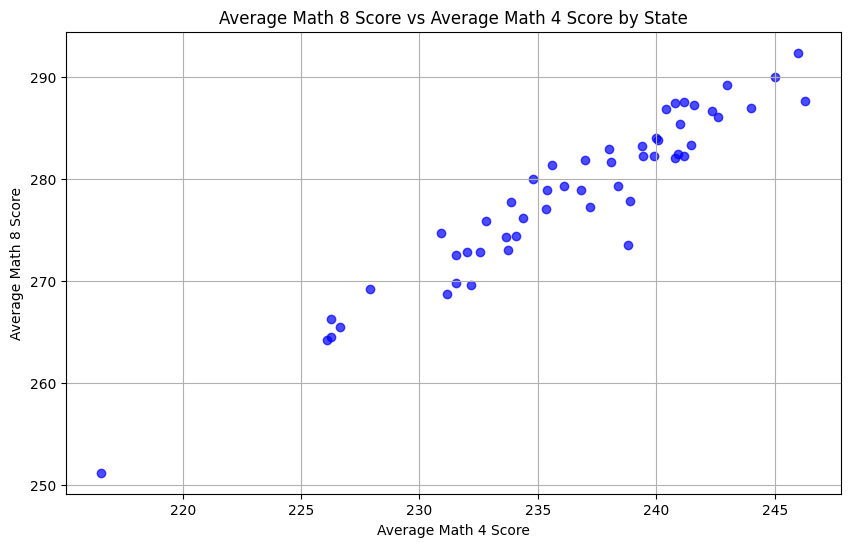

In [9]:
import matplotlib.pyplot as plt

# I group the data by state and calculate the mean of AVG_MATH_4_SCORE and AVG_MATH_8_SCORE
avg_math_4_by_state = df.groupby("STATE")["AVG_MATH_4_SCORE"].mean()
avg_math_8_by_state = df.groupby("STATE")["AVG_MATH_8_SCORE"].mean()

# I then Pplot an XY scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_math_4_by_state, avg_math_8_by_state, color='blue', alpha=0.7)

plt.title("Average Math 8 Score vs Average Math 4 Score by State")
plt.xlabel("Average Math 4 Score")
plt.ylabel("Average Math 8 Score")
plt.grid(True)

plt.show()






This is a scatter plot comparing the math 4 scores and math 8 socres for each state. This graph demonstrates a correlation between the two, when the math 8 scores increases, the math 4 increases as well.

**Visualization 2**

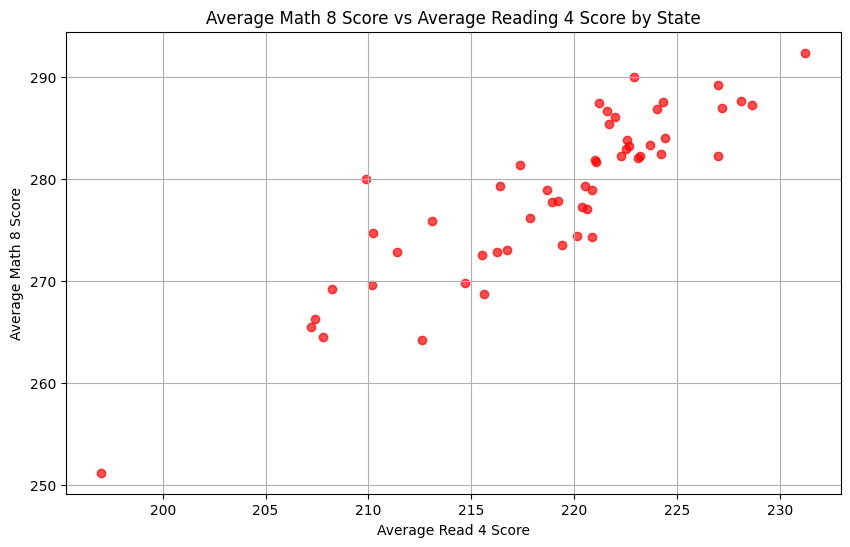

In [10]:
import matplotlib.pyplot as plt

# I group the data by state and calculate the mean of AVG_MATH_4_SCORE and AVG_MATH_8_SCORE
avg_read_4_by_state = df.groupby("STATE")["AVG_READING_4_SCORE"].mean()
avg_math_8_by_state = df.groupby("STATE")["AVG_MATH_8_SCORE"].mean()

# I then plot an XY scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_read_4_by_state, avg_math_8_by_state, color='red', alpha=0.7)

plt.title("Average Math 8 Score vs Average Reading 4 Score by State")
plt.xlabel("Average Read 4 Score")
plt.ylabel("Average Math 8 Score")
plt.grid(True)

plt.show()

This is another scatterplot that demonstrates the correlation between the math 8 scores and read 4 scores in each state. As expected, it is not as correlated as math4 and math 8, but there is still a positive correlation between the 2 test scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# I made the value X which is the data for the amount of people in Grades4, Grades8, and Grade12
X = df[['GRADES_8_G', 'GRADES_4_G', 'GRADES_12_G']].dropna()
# I then made Y, which the the dataframe to locate the value Y finds the index of the values
# Found in X and then finds the Grades All G value
y = df.loc[X.index]['GRADES_ALL_G']
# I now fill the empty y values with the median of y
y.fillna(y.median(), inplace=True)

In [13]:
# I now train my model created above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# I create a model using the LinerRegression Library
model = LinearRegression()

In [16]:
# I apply the Linear Regression to my model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# I now predict my model in this code
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [18]:
model.score(X_test, y_test)

# I find the R^2 value along with the model coefficients to see how effecitve my model is
print(model.coef_)
print(model.score(X_test, y_test))

-3451.1223061823985
[4.366619   7.86475764 1.29870482]
0.9988979689383943


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

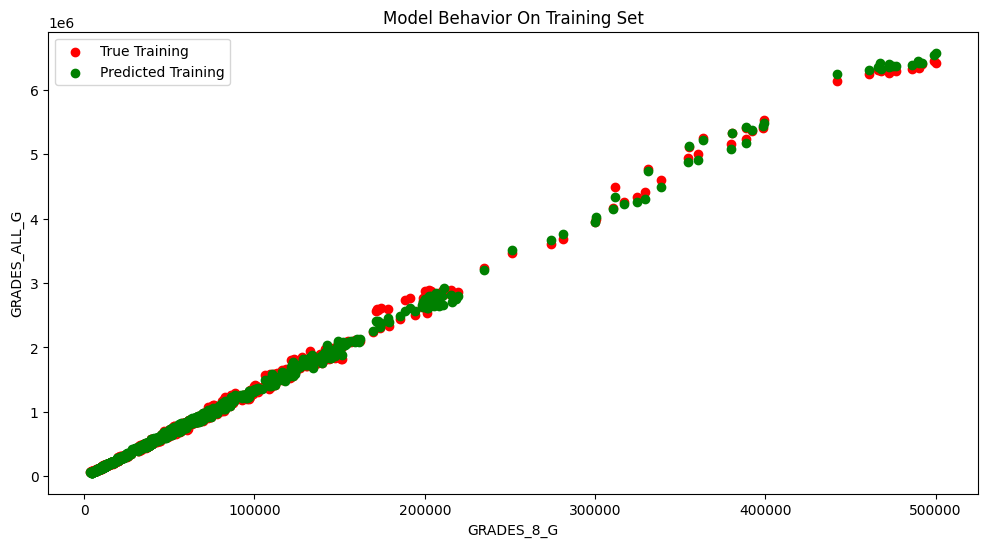

In [31]:
col_name = 'GRADES_8_G'
# I made my plot using Grade 8 G and using my model to predict All Grades
f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
# I then add some axis names to my plot
plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('GRADES_ALL_G')
plt.title("Model Behavior On Training Set")



Text(0.5, 1.0, 'Model Behavior on Testing Set')

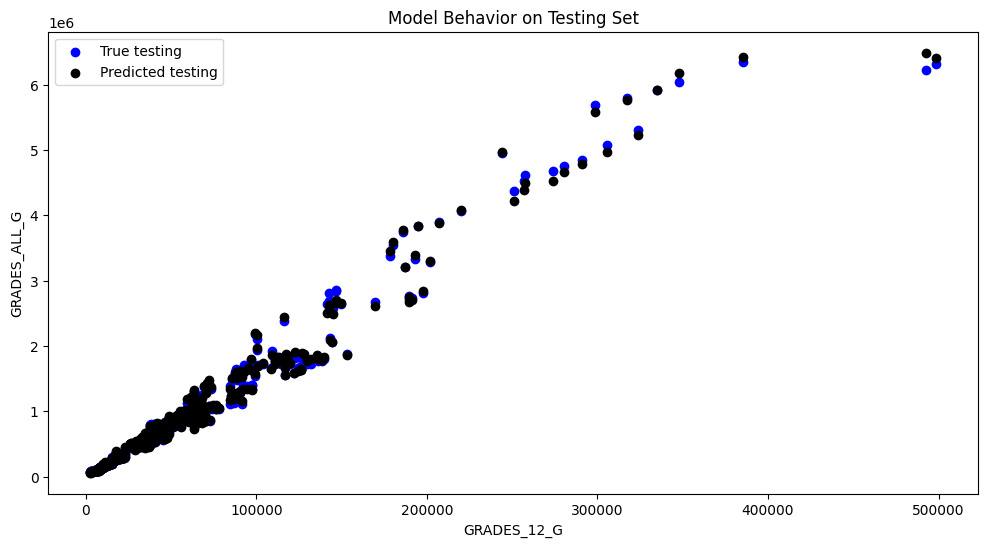

In [30]:
col_name = 'GRADES_12_G'
# I find the total enrollment based on the Grade 12 enrollemnt
f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")
# I label my axis and my legend and my title
plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('GRADES_ALL_G')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

Overall the performance of my model was succesful, as there was a huge correlation between the for the Grade_4, Grade_8 and Grade_12 numbers compared to the total enrollment for the random state that the model chose. With an R^2 value of 0.9988979689383943, this demonstrates that there is an extremely strong correlation between the two values.